# Linear Regression with Gradient Descent and Brute Force

This notebook demonstrates how to load a real dataset, visualize it, and fit a linear model using both a brute-force approach and gradient descent.

## Load the Data

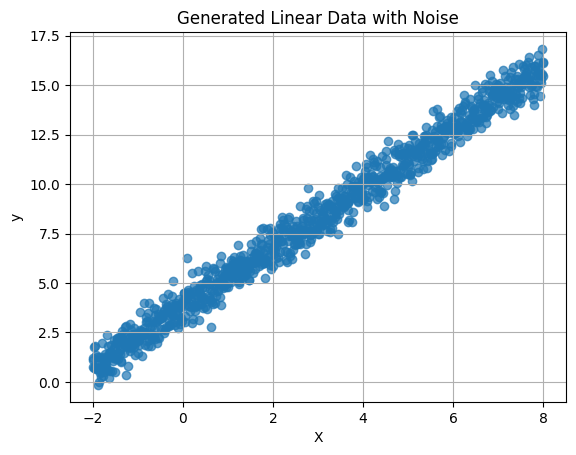

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
# Load the data
data = np.loadtxt("linear_regression_data.txt", skiprows=1)
X = data[:, 0].reshape(-1, 1)
y = data[:, 1].reshape(-1, 1)

# Plot the data
plt.scatter(X, y, alpha=0.7)
plt.xlabel("X")
plt.ylabel("y")
plt.title("Generated Linear Data with Noise")
plt.grid(True)
plt.show()

### Helper: Plot Line Given Theta

In [5]:
def plot_line(theta_1, theta_0):
    plt.scatter(X, y, alpha=0.5)
    x_vals = np.array([X.min(), X.max()])
    y_vals = theta_1 * x_vals + theta_0
    plt.plot(x_vals, y_vals, 'r-', label=f"y = {theta_1:.2f}x + {theta_0:.2f}")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.title("Model Fit")
    plt.legend()
    plt.grid(True)
    plt.show()

## Brute Force Grid Search for Best Theta

Brute-force search took 0.27 seconds
Best brute-force theta: (1.507537688442211, 3.7939698492462313), MSE: 0.3444


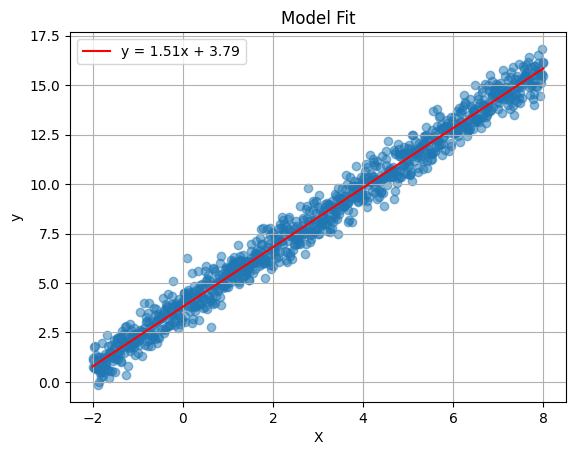

In [6]:
theta_1_vals = np.linspace(1, 2, 200)
theta_0_vals = np.linspace(3, 5, 200)

best_loss = float('inf')
best_theta = (0, 0)
start_time = time.time()
for theta_1 in theta_1_vals:
    for theta_0 in theta_0_vals:
        y_pred = theta_1 * X + theta_0
        loss = np.mean((y - y_pred) ** 2)
        if loss < best_loss:
            best_loss = loss
            best_theta = (theta_1, theta_0)
end_time = time.time()
print(f"Brute-force search took {end_time - start_time:.2f} seconds")
print(f"Best brute-force theta: {best_theta}, MSE: {best_loss:.4f}")
plot_line(*best_theta)

## Gradient Descent Implementation

Gradient descent took 0.02 seconds
Learned theta from GD: slope=1.51, intercept=3.79


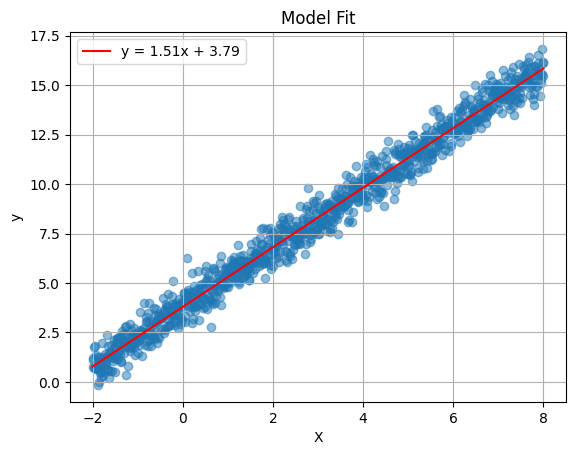

In [7]:
# Add x0 = 1 to each instance for bias term
X_b = np.c_[np.ones((len(X), 1)), X]
theta = np.random.randn(2, 1)  # random init
eta = 0.05
n_iterations = 1000
m = len(X_b)
start_time = time.time()
# Implement gradient descent here
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta -= eta * gradients

end_time = time.time()
print(f"Gradient descent took {end_time - start_time:.2f} seconds")

print(f"Learned theta from GD: slope={theta[1,0]:.2f}, intercept={theta[0,0]:.2f}")
plot_line(theta[1, 0], theta[0, 0])

## Scikit-learn SGDRegressor

SGDRegressor took 0.00 seconds
SGDRegressor coefficients: slope=1.49, intercept=3.80


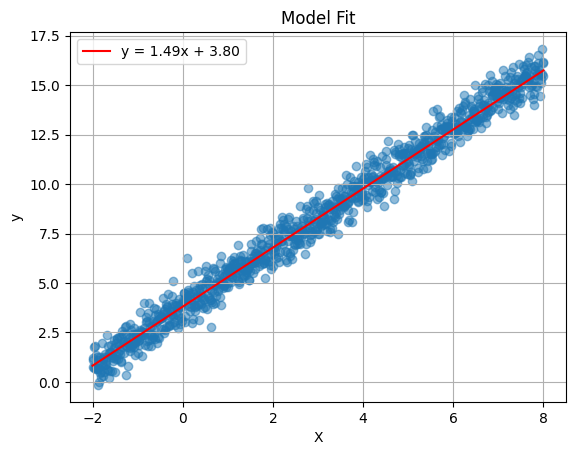

In [8]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
start_time = time.time()
sgd_reg.fit(X, y.ravel())
end_time = time.time()
print(f"SGDRegressor took {end_time - start_time:.2f} seconds")
print(f"SGDRegressor coefficients: slope={sgd_reg.coef_[0]:.2f}, intercept={sgd_reg.intercept_[0]:.2f}")
plot_line(sgd_reg.coef_[0], sgd_reg.intercept_[0])

In [9]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None)